In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import sys
import zipfile

sys.path.append('..')
from scripts.project_functions import load_n_process as lnp

In [2]:
df = lnp("C:/Users/riora/Documents/A+Documents/UBC/Summer21/DATA301/Project/Data/firesNEW.csv")

In [3]:
df

,index,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_TIME,CAUSE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,16,17,POWER,2004,2004-10-6 0:00:00,1415.0,Human,2004-10-21 0:00:00,295.0,1000.0,16823.0,G,38.523333,-120.211667,CA,6005.0,Amador County
1,17,18,FREDS,2004,2004-10-13 0:00:00,1618.0,Human,2004-10-17 0:00:00,291.0,1800.0,7700.0,G,38.780000,-120.260000,CA,6017.0,El Dorado County
2,25,26,BACHELOR,2004,2004-7-20 0:00:00,1405.0,Natural,2004-7-20 0:00:00,202.0,1600.0,10.0,C,33.315833,-105.512222,NM,35027.0,Lincoln County
3,37,38,HOWARD GAP,2005,2005-1-27 0:00:00,2200.0,Human,2005-1-28 0:00:00,28.0,300.0,50.3,C,35.000278,-83.351111,NC,37113.0,Macon County
4,39,40,AUSTIN CREEK,2005,2005-2-12 0:00:00,1520.0,Human,2005-2-13 0:00:00,44.0,330.0,125.0,D,36.001667,-81.590000,NC,37027.0,Caldwell County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83570,2165253,400480175,10365,2018,2018-11-14 0:00:00,1132.0,Human,2018-11-14 0:00:00,318.0,2234.0,100.0,D,31.771240,-110.700500,AZ,4019.0,Pima County
83571,2165558,400480523,1847,2018,2018-2-17 0:00:00,1540.0,Human,2018-2-17 0:00:00,48.0,2012.0,50.0,C,34.676134,-112.442024,AZ,4025.0,Yavapai County
83572,2165563,400480528,130,2018,2018-6-4 0:00:00,1345.0,Human,2018-6-4 0:00:00,155.0,1800.0,650.0,E,34.516515,-110.437934,AZ,4017.0,Navajo County
83573,2166438,400481557,271409,2018,2018-7-24 0:00:00,829.0,Human,2018-7-24 0:00:00,205.0,903.0,55.0,C,33.323958,-111.909939,AZ,4013.0,Maricopa County


# How has the location or frequency of wildfires in the US changed in the past 30 years, and does this show a potential correlation with climate change (ie. increasing temperatures)?

To answer the above question, I first decided to view the northernmost fire every year and plot it as a time series. There is chance that only the frequency of these fires in northernmost regions would have increased, which would not show a trend in this plot, but nonetheless, here is the result:


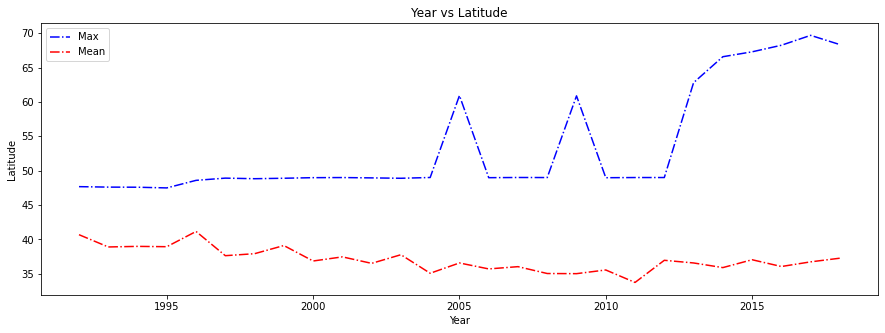

In [4]:
# Take northernmost fire every year and mean fire latitude and plot it versus the year
year_p_lat = df[['FIRE_YEAR', 'LATITUDE']].copy()
max_lat = year_p_lat.groupby(['FIRE_YEAR']).max()
mean_lat = year_p_lat.groupby(['FIRE_YEAR']).mean()
max_lat.reset_index(inplace=True)
mean_lat.reset_index(inplace=True)

latdf = pd.merge(mean_lat, max_lat, how = 'outer', on="FIRE_YEAR")
latdf.rename(columns = {'LATITUDE_x':'MEAN_LAT', 'LATITUDE_y':'MAX_LAT'}, inplace = True)

dimensions = (15, 5)
f, ax = plt.subplots(figsize=dimensions)
ax.plot(latdf['FIRE_YEAR'], latdf['MAX_LAT'], color="blue", label="Max", linestyle="dashdot")
ax.plot(latdf['FIRE_YEAR'], latdf['MEAN_LAT'], color="red", label="Mean", linestyle="dashdot")
plt.title('Year vs Latitude')
plt.xlabel("Year")
plt.ylabel("Latitude")
ax.legend()
plt.show()

There are a few conclusions I can make from the above plot regarding my data:
​   
    
    - On average, the mean latitude of forest fires has not only not shown an upwards trend over the course of the 30 years we are looking at, it has actually slightly decreased.
    - The maximum latitude every year seems to have increased, but may be due to one off events in northern regions such as Alaska, and therefore might pain the wrong picture.
    - This leads me to make a loose assumption that the mean fire location could have lowered due to the increase in frequency fires in the southernmost parts of the country, while climate-change induced changes in temperature may be less noticeable in northernmost states.

Based in my last point above, it would be interesting to plot the change of frequency of fires in the suthernmost regious of the US, and compare them to the same index but for the northernmost states.

Text(10.436603751187086, 0.5, 'Fire Frequency')

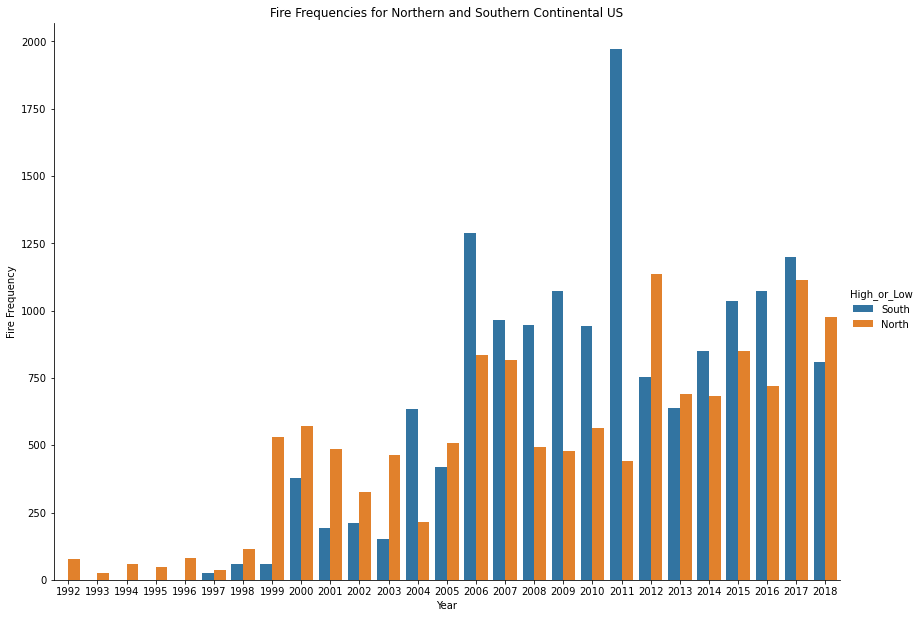

In [5]:
# Take the lower 30% latitude fires' frequency every year, and plot it on the same graph as the upper 30% latitude fires.
low = df[['FIRE_YEAR', 'LATITUDE']].copy()
high = df[['FIRE_YEAR', 'LATITUDE']].copy()

#I will only take values in continental US, to allow for a greater number of fires included in the "high" dataset. AKA 49th parallel down (Canada), and 24th up (Key West).
lat_range = 49-24
lowlimit = 24+lat_range*0.3
highlimit = 24+lat_range*0.7

low.drop(low[(low['LATITUDE']>lowlimit)].index, inplace=True)
high.drop(high[(high['LATITUDE']<highlimit)].index, inplace=True)

low.rename(columns = {'LATITUDE':'FREQ'}, inplace = True)
high.rename(columns = {'LATITUDE':'FREQ'}, inplace = True)

low_freq = low.groupby(['FIRE_YEAR']).count()
low_freq.reset_index(inplace=True)
high_freq = high.groupby(['FIRE_YEAR']).count()
high_freq.reset_index(inplace=True)

high_and_low = pd.merge(low_freq, high_freq, how = 'outer', on="FIRE_YEAR")
high_and_low.rename(columns = {'FREQ_x':'South'}, inplace = True)
high_and_low.rename(columns = {'FREQ_y':'North'}, inplace = True)

melt = pd.melt(high_and_low, id_vars="FIRE_YEAR", var_name="High_or_Low", value_name="Frequency")

sns.catplot(x='FIRE_YEAR', y='Frequency', hue='High_or_Low', data=melt, kind='bar', height=8.27, aspect=11.7/8.27)
plt.title('Fire Frequencies for Northern and Southern Continental US')
plt.xlabel('Year')
plt.ylabel('Fire Frequency')



### As we can see above, there are four main observations I can draw from this visualization:

1. In the first ten years of the data, southern fires were either less recorded, or had a lower frequency than northern.
2. From roughly 2004 onwards, southern continental US fires seem to go through a sudden spike in frequency, and greatly beat the amount of fires in the top 30% of the country.
3. My previous hypothersis that "the mean fire location could have lowered due to the increase in frequency fires in the southernmost parts of the country" seems to be supported by this data.
### Most importantly:

4. **The frequency of fires in continental US again shows a visible increase in the past 30 years.**
   
   
   
   
While we have found some information relating to the change in fire location across the US, we have also hit somewhat of a roadblock. While there may be more in depth analyses possible with the fire frequency, for the purposes of noticing location-bases trends it is best to not dive too deeply in other variables. Before making one last hopefully all-emcompassing visual I will travel down one more road: Fire duration.

Because the fire frequency index gave some insight into possible patterns in the location of fires, looking at the duration of individual fires could hopefully show a similar pattern, solidifying our ideas.




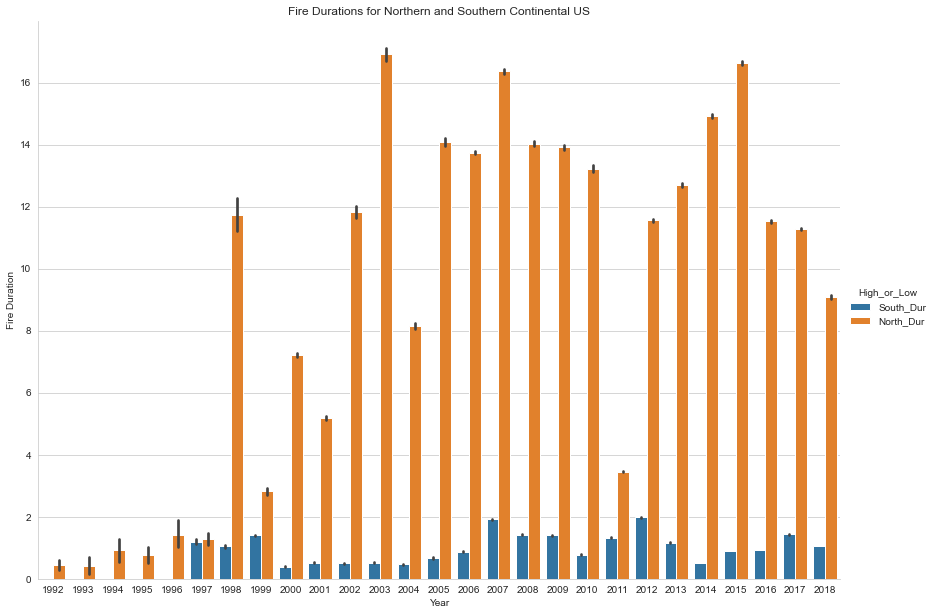

In [8]:
# modify duration plot to show both south and north fires

duration = df[['FIRE_YEAR', 'LATITUDE', 'DISCOVERY_DATE', 'CONT_DATE']].copy()

indexNames = duration[ duration['CONT_DATE'] == '9999-12-31 0:00:00' ].index
duration.drop(indexNames , inplace=True)

duration['Disc_Datetime'] = (pd.to_datetime(duration['DISCOVERY_DATE'])).dt.date
duration['Cont_Datetime'] = (pd.to_datetime(duration['CONT_DATE'])).dt.date

duration['Fire_Duration'] = (duration['Cont_Datetime'] - duration['Disc_Datetime']).dt.days


low = duration[['FIRE_YEAR', 'LATITUDE', 'Fire_Duration']].copy()
high = duration[['FIRE_YEAR', 'LATITUDE', 'Fire_Duration']].copy()

#I will once again only take values in continental US, to allow for a greater number of fires included in the "high" dataset. AKA 49th parallel down (Canada), and 24th up (Key West).

lat_range = 49-24
lowlimit = 24+lat_range*0.3
highlimit = 24+lat_range*0.7

low.drop(low[(low['LATITUDE']>lowlimit)].index, inplace=True)
high.drop(high[(high['LATITUDE']<highlimit)].index, inplace=True)

low.drop(columns=['LATITUDE'], inplace=True)
high.drop(columns=['LATITUDE'], inplace=True)

low.reset_index(inplace=True)
high.reset_index(inplace=True)

high_and_low = pd.merge(low, high, how = 'outer', on="FIRE_YEAR")
high_and_low.drop(columns=['index_x', 'index_y'], inplace=True)
high_and_low.rename(columns = {'Fire_Duration_x':'South_Dur'}, inplace = True)
high_and_low.rename(columns = {'Fire_Duration_y':'North_Dur'}, inplace = True)

melt = pd.melt(high_and_low, id_vars="FIRE_YEAR", var_name="High_or_Low", value_name="Fire_Duration")

sns.catplot(x='FIRE_YEAR', y='Fire_Duration', hue='High_or_Low', data=melt, kind='bar', height=8.27, aspect=11.7/8.27)
plt.title('Fire Durations for Northern and Southern Continental US')
plt.xlabel('Year')
plt.ylabel('Fire Duration')

plt.show()

This is a very surprising result. The visual clearly shows suthernmost fires in continental US having a much much lower average duration (in days) than their northern counterparts. This might lead me to believe the southern fires tend to have only a few long-lasting fires, while due to the high tree coverage in northern states, fires may be better equipped to last longer for the majority of the time.

After having learned some interesting facts about the uS' wildfires and their dependence on location, the final step in my research is to present the data in such a way to clearlyshow which areas are the most affected, and if we can tell a noticeable differenc between the appearance of fires from a map-like visual.

To ensure the data is clear and readable, I will make two main decisions:

    -Only fires of class E,F, and G (AKA the largest) of fires will be plotted.
    - I will split the fires into five blocks, to see if we can easily notice changes in location across the observed time period.

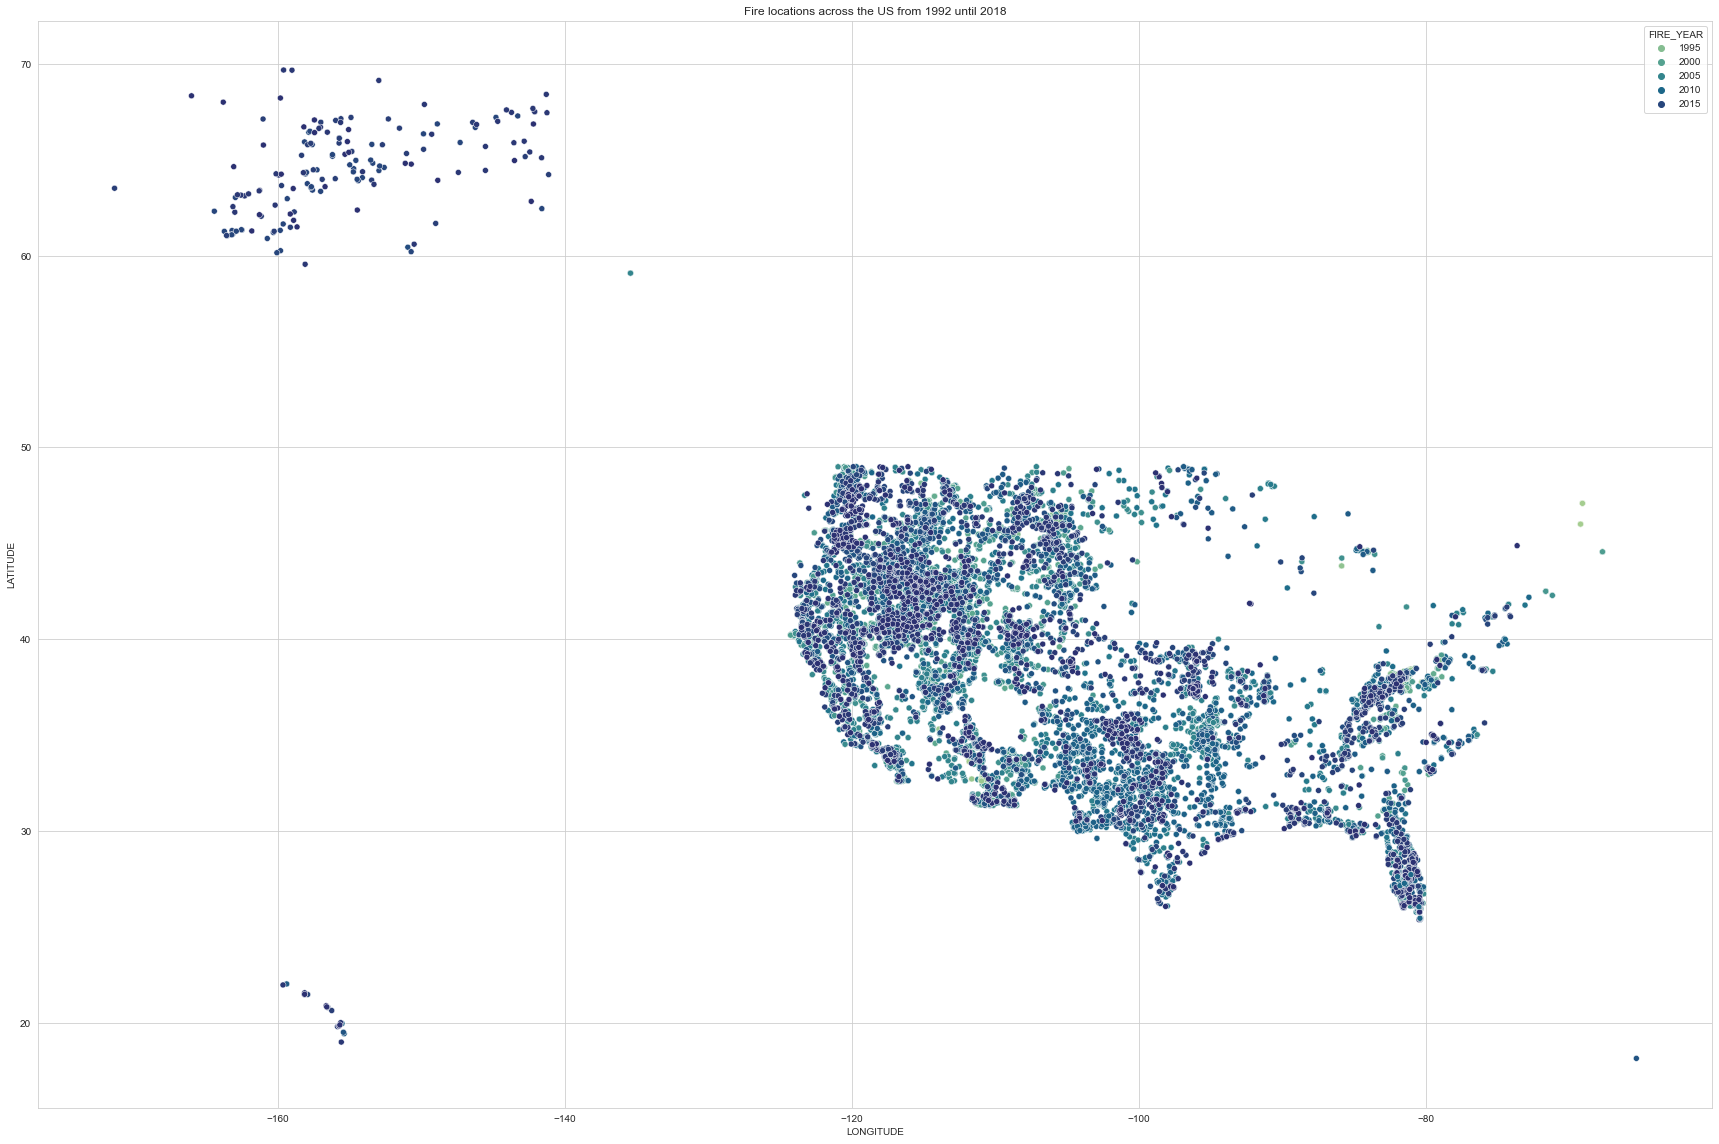

*The FIRE_YEAR legend refers to the year closing the respective ~5 year window represented by the colour.


In [7]:
#Plot latitude vs longitude with later years changing colour

span = df['FIRE_YEAR'].max() - df['FIRE_YEAR'].min()
stop1 = int(df['FIRE_YEAR'].min() + 5)
stop2 = int(df['FIRE_YEAR'].min() + 10)
stop3 = int(df['FIRE_YEAR'].min() + 15)
stop4 = int(df['FIRE_YEAR'].min() + 20)
stop5 = df['FIRE_YEAR'].max()

latlong = df[['FIRE_YEAR', 'LATITUDE', 'LONGITUDE', 'FIRE_SIZE_CLASS']].copy()
latlong['FIRE_YEAR'] = pd.to_numeric(latlong['FIRE_YEAR'])
latlong.drop(latlong[(latlong['FIRE_SIZE_CLASS']=='C')].index, inplace=True)
latlong.drop(latlong[(latlong['FIRE_SIZE_CLASS']=='D')].index, inplace=True)


one = pd.DataFrame(latlong.drop(latlong[(latlong['FIRE_YEAR']>stop1)].index))
two = pd.DataFrame(latlong.drop(latlong[(latlong['FIRE_YEAR']>stop2)].index))
three = pd.DataFrame(latlong.drop(latlong[(latlong['FIRE_YEAR']>stop3)].index))
four = pd.DataFrame(latlong.drop(latlong[(latlong['FIRE_YEAR']>stop4)].index))
five = pd.DataFrame(latlong.drop(latlong[(latlong['FIRE_YEAR']>stop5)].index))

concatenated = pd.concat([one.assign(dataset='set1'), two.assign(dataset='set2'), three.assign(dataset='set3'), four.assign(dataset='set4'), five.assign(dataset='set5')])


sns.set_style("whitegrid")
dims = (30, 20)
fig, ax = plt.subplots(figsize=dims)
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=concatenated, hue='FIRE_YEAR', palette = "crest")

plt.title('Fire locations across the US from 1992 until 2018')
plt.show()

print('*The FIRE_YEAR legend refers to the year closing the respective ~5 year window represented by the colour.')

While the plot does not provide as much detailed information as other more mathematical visualizations, we can see some of the same trends we have observed in our previous analyses:

    - The fires in the northernmost regions appear to have occurred at much later dates than southern.
    - In a roughly 5 year long period between 2005 and 2010 fires were much more common in the southern states, and show a much greater rate of occurrence.
    - Nothing can be said here about fire duration, but the lower number of fires in the south in the later years of the data may suggest southern fires simply lasted longer, and failed to be classified as new occurrences more often. Further analysis on fire duration should be done to support this.
    - Supporting an observation made in the final sections of the Exploratory Data analysis, we can see the fires only reached the northern and southernmost tips of the country such as Alaska and Hawaii in the last ten to fifteen years.
    
In conclusion, let's revisit my original research question:

**How has the location or frequency of wildfires in the US changed in the past 30 years, and does this show a potential correlation with climate change (ie. increasing temperatures)?**

With the graphics presented, we can be confident there have been some visible changes in US fires' statistics with regards to location. If the pattern continues as follows, we can expect another 5 years of increasing northern US fires in terms of frequency, and a steady maintenance of their duration. More broadly, the number of fire in the US seems to have drastically increased in the past 20-30 years. The western reguions of the continental US, while being widely burned in the past, continue to show a large number of fires every year, and the northern regions are showing long-lating fires, potentially due to the high forest density present in those areas. While the numbers continue to increase, and have taken a huge leap since the beginnign of this dataset in the early 90s, some data may suggest the increase has slowed down. The fact remains we are dealing with an enormous amount of fires, and most of the US continues to be burned every single year.